# Zachary's Karate Club Split

-------------------------------------------------

The raw code for this Jupyter notebook is by default hidden for easier reading. The main focus of this particular page of the notebook is on the graphs and their interpretation. To toggle on/off the raw code, click below:

In [1]:
# Setup Code toggle button
from IPython.core.display import HTML  

HTML(''' 
<center><h3>
<a href="javascript:code_toggle()">Talk is cheap, show me the code.</a>
</center></h3>
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
''')

In [10]:
# NetworkX gets warnings about deprececated Matplotlib libs
import warnings
warnings.filterwarnings('ignore')

# Setup notebook theme
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme(get_themes()[1])

&nbsp;

## The Problem

We know the result of the [Karate Club (Zachary, 1977)](http://aris.ss.uci.edu/~lin/76.pdf) split. Prove or disprove that the result of split could have been predicted by the weighted graph of social interactions.  How well does the mathematical model represent reality?

* Original paper
  * [http://aris.ss.uci.edu/~lin/76.pdf](http://aris.ss.uci.edu/~lin/76.pdf)
* Slides
  * [http://www-personal.umich.edu/~ladamic/courses/networks/si614w06/ppt/lecture18.ppt](http://www-personal.umich.edu/~ladamic/courses/networks/si614w06/ppt/lecture18.ppt)
  * [http://clair.si.umich.edu/si767/papers/Week03/Community/CommunityDetection.pptx](http://clair.si.umich.edu/si767/papers/Week03/Community/CommunityDetection.pptx)
* Code and data
  * [https://networkx.readthedocs.io/en/stable/examples/graph/karate_club.html](https://networkx.readthedocs.io/en/stable/examples/graph/karate_club.html)
  * [http://nbviewer.ipython.org/url/courses.cit.cornell.edu/info6010/resources/11notes.ipynb](http://nbviewer.ipython.org/url/courses.cit.cornell.edu/info6010/resources/11notes.ipynb)
  * [http://stackoverflow.com/questions/9471906/what-are-the-differences-between-community-detection-algorithms-in-igraph/9478989#9478989](http://stackoverflow.com/questions/9471906/what-are-the-differences-between-community-detection-algorithms-in-igraph/9478989#9478989)
  * [http://stackoverflow.com/questions/5822265/are-there-implementations-of-algorithms-for-community-detection-in-graphs](http://stackoverflow.com/questions/5822265/are-there-implementations-of-algorithms-for-community-detection-in-graphs)
  * [http://konect.uni-koblenz.de/networks/ucidata-zachary](http://konect.uni-koblenz.de/networks/ucidata-zachary)
  * [http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#zachary](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#zachary)
  * [https://snap.stanford.edu/snappy/doc/reference/CommunityGirvanNewman.html](https://snap.stanford.edu/snappy/doc/reference/CommunityGirvanNewman.html)
  * [http://igraph.org/python/doc/igraph-pysrc.html#Graph.community_edge_betweenness](http://igraph.org/python/doc/igraph-pysrc.html#Graph.community_edge_betweenness)

## Get A Feel For The Data

The data is already available from NetworkX [as shown in their documentation](https://networkx.readthedocs.io/en/stable/examples/graph/karate_club.html). Before doing anything with this data there are a lot of different graphing methods we can use to get a feel for it. 

### Graphing Based On Node Degree

Using a standard "spring model" layout we can immediately see the two highly connected nodes using the hot and cold degree colorscale. On the left there is also an isolated group connected to node `0`. The interesting Characters here are deffinetly nodes `0` and `33` as well as `1`, `2`, and `32` who may throw their weight to back one pulling other members with them.

&nbsp;

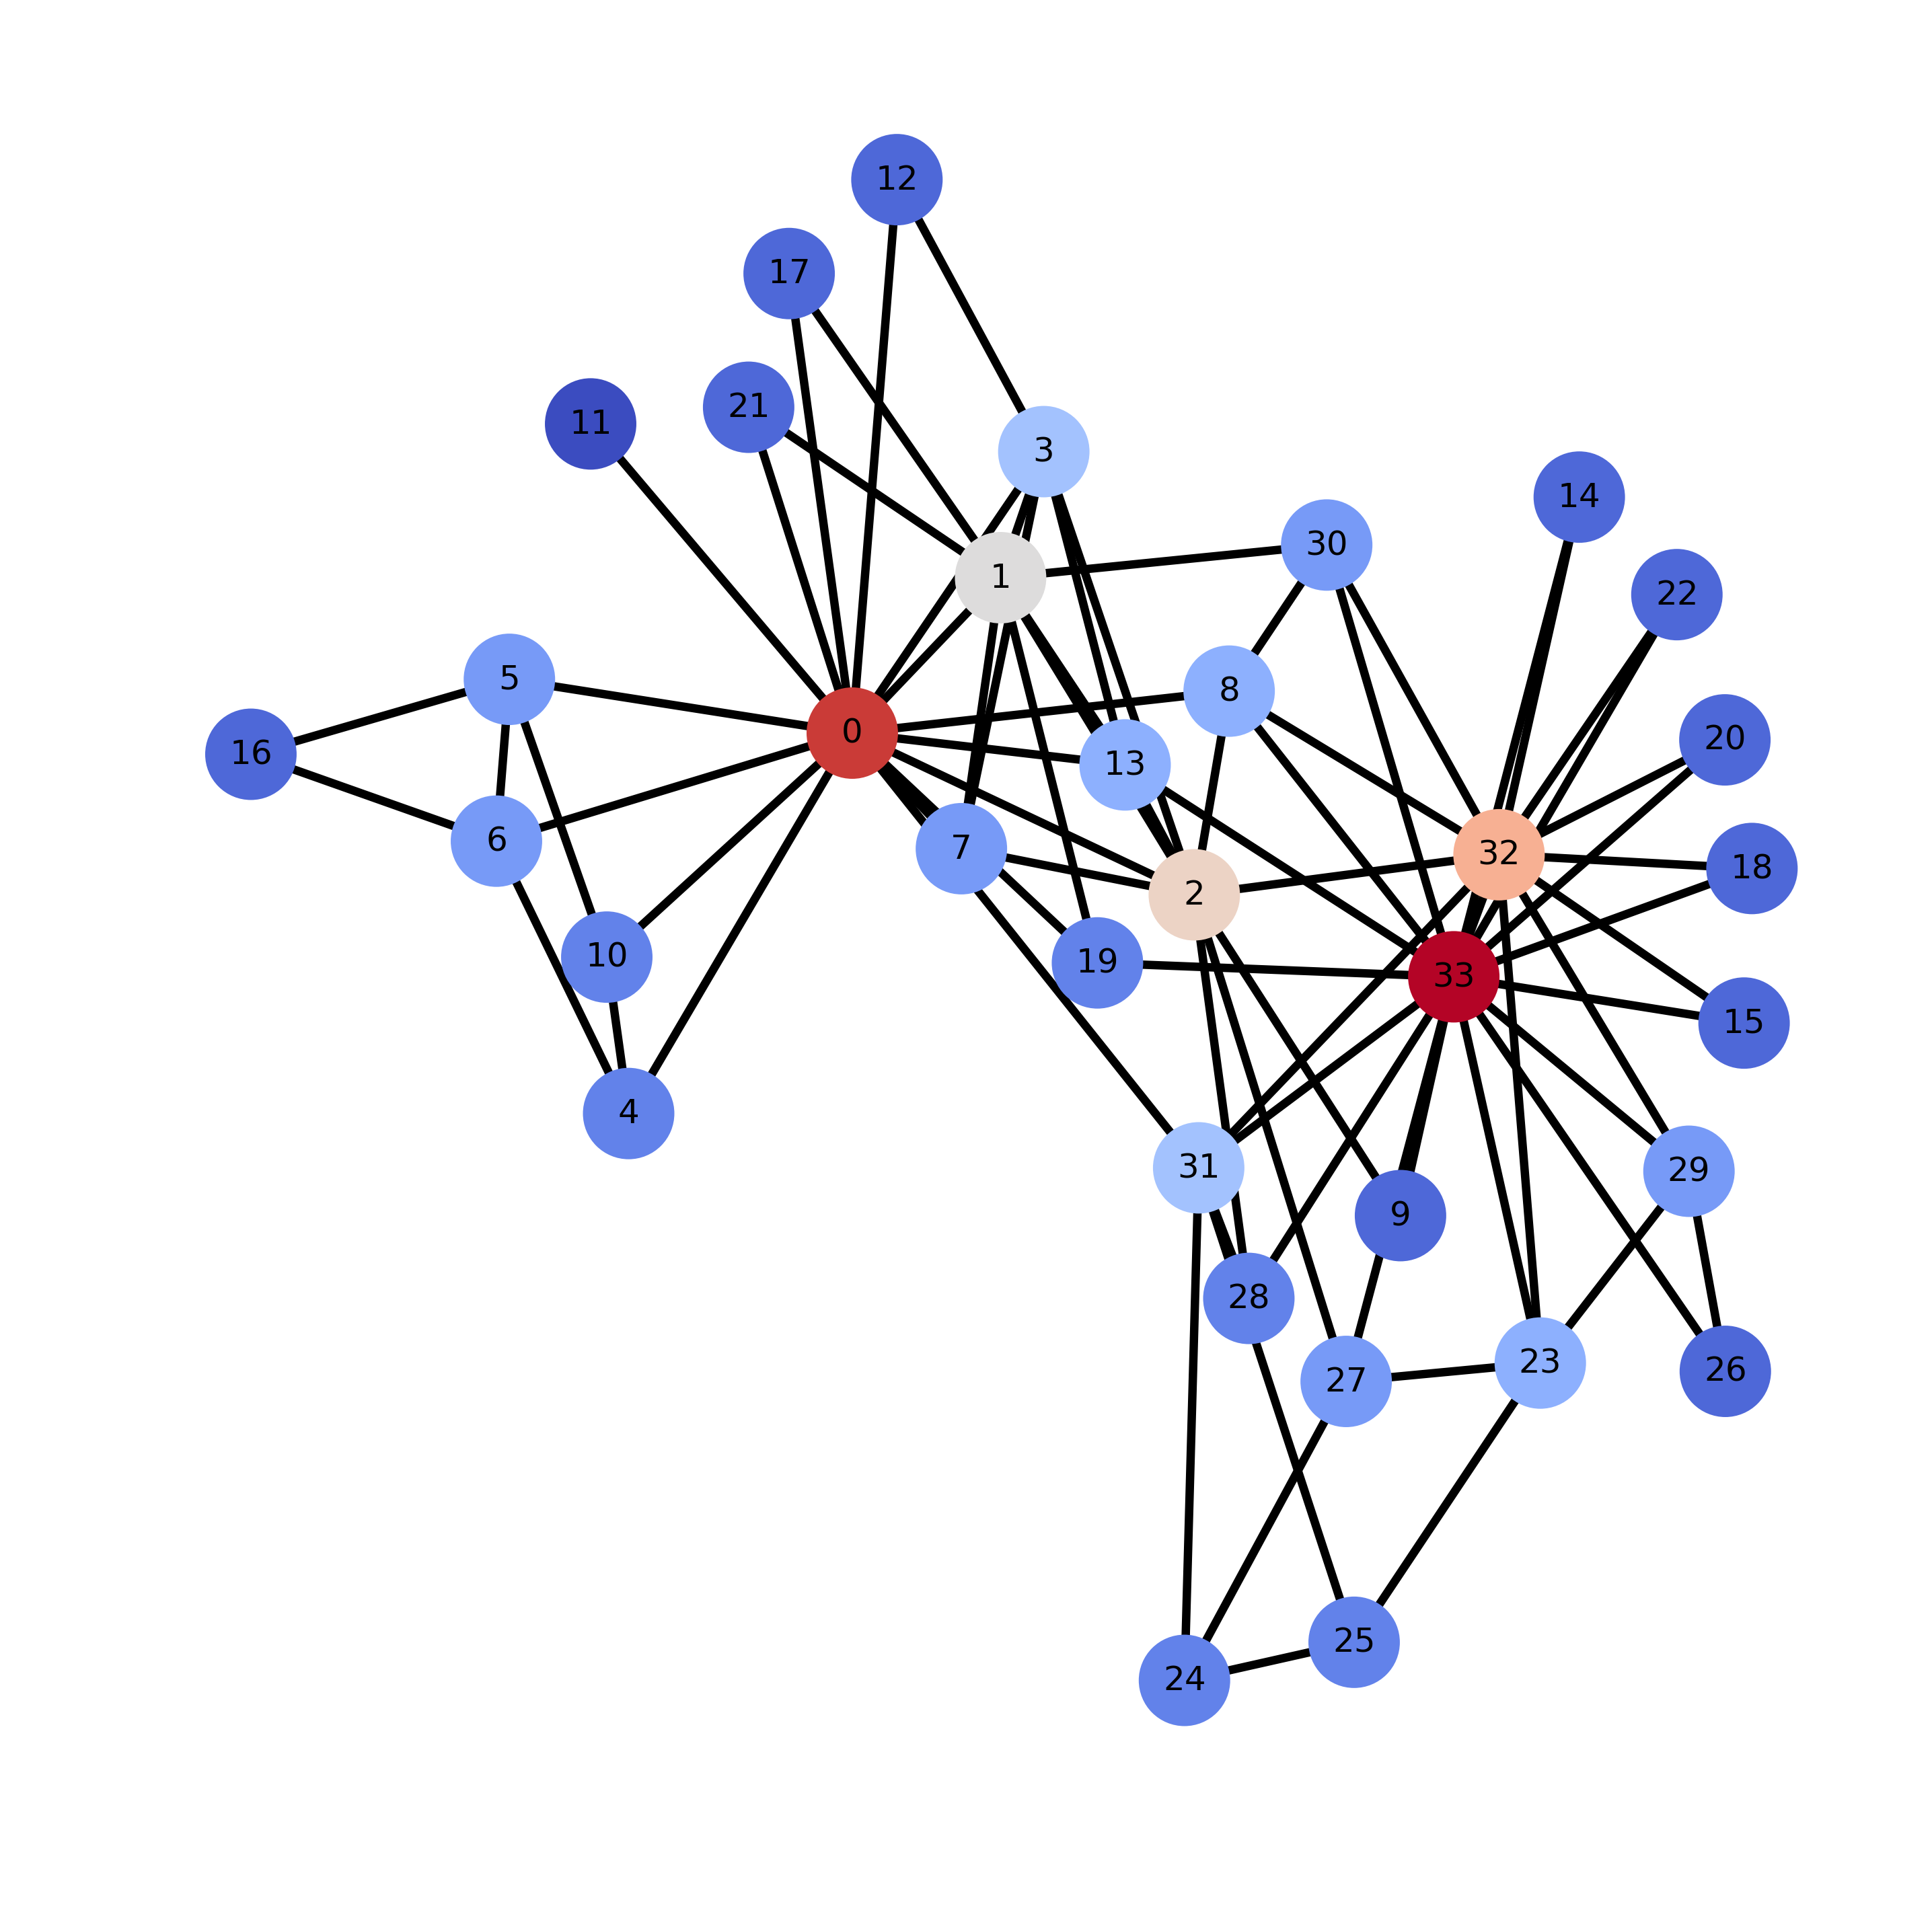

In [180]:
import pylab as plt
import networkx as nx
G=nx.karate_club_graph()
node_color=[float(G.degree(v)) for v in G]
cmap = plt.cm.coolwarm

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="fdp")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()

Another way to represent the data is as a [layerd graph drawing](https://en.wikipedia.org/wiki/Layered_graph_drawing). Each node is positioned in a horizontal row in a hierarchical pattern based on its separation from other nodes. This highlights immediately that nodes `0` and `33` are as seperated from eachother as possible, another interesting point is the isolated group from node `0` off to the right who do not interact with anyone from the main group. Another interesting thing is that node `32` is very close to `33` and has many connections which may be useful in pulling more members, `0` has two less connected nodes `1` and `2` which also are connected to members in the middle.

&nbsp;

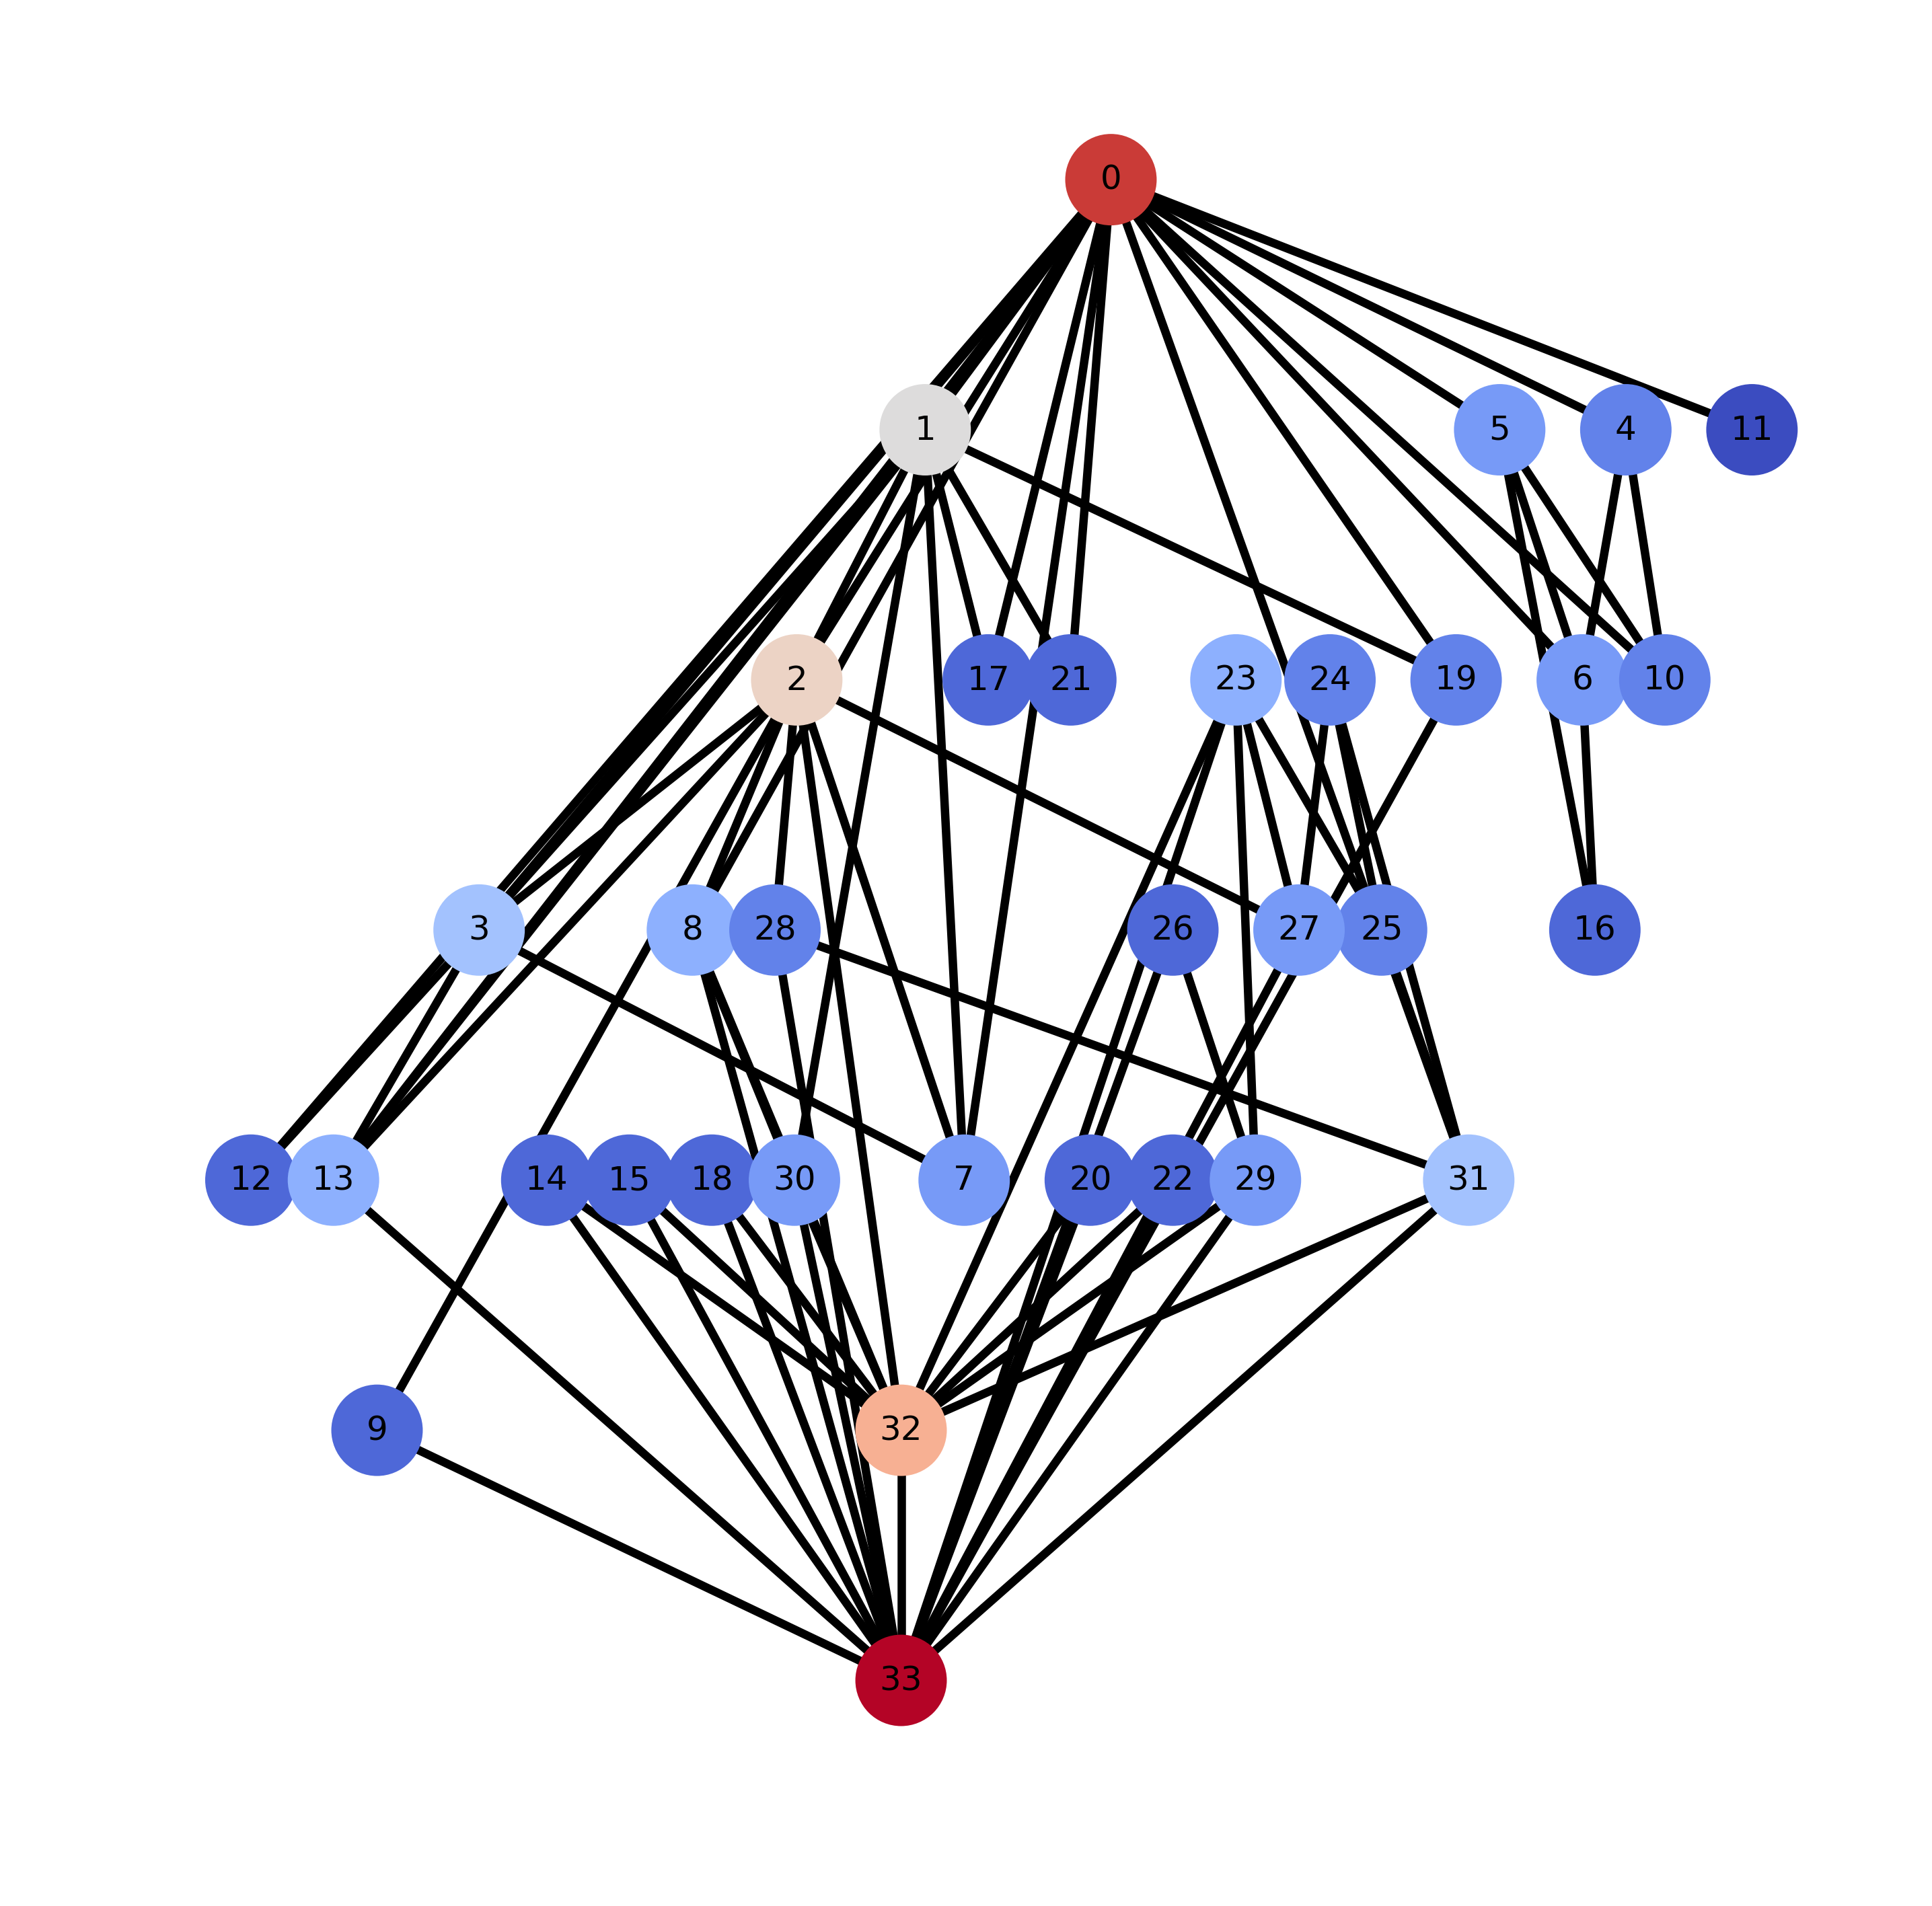

In [82]:
plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="dot")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()

Another layout that is useful here is the `twopi` layout which uses a radial layout styled after [Graham Wills 97 paper using it to detect telecomunication fraud](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.43.2646&rep=rep1&type=pdf). Setting the root node to interesting characters might reveal something interesting as nodes are placed in concentric circles around it depending on their distance, litterally showing their inner circle.

&nbsp;

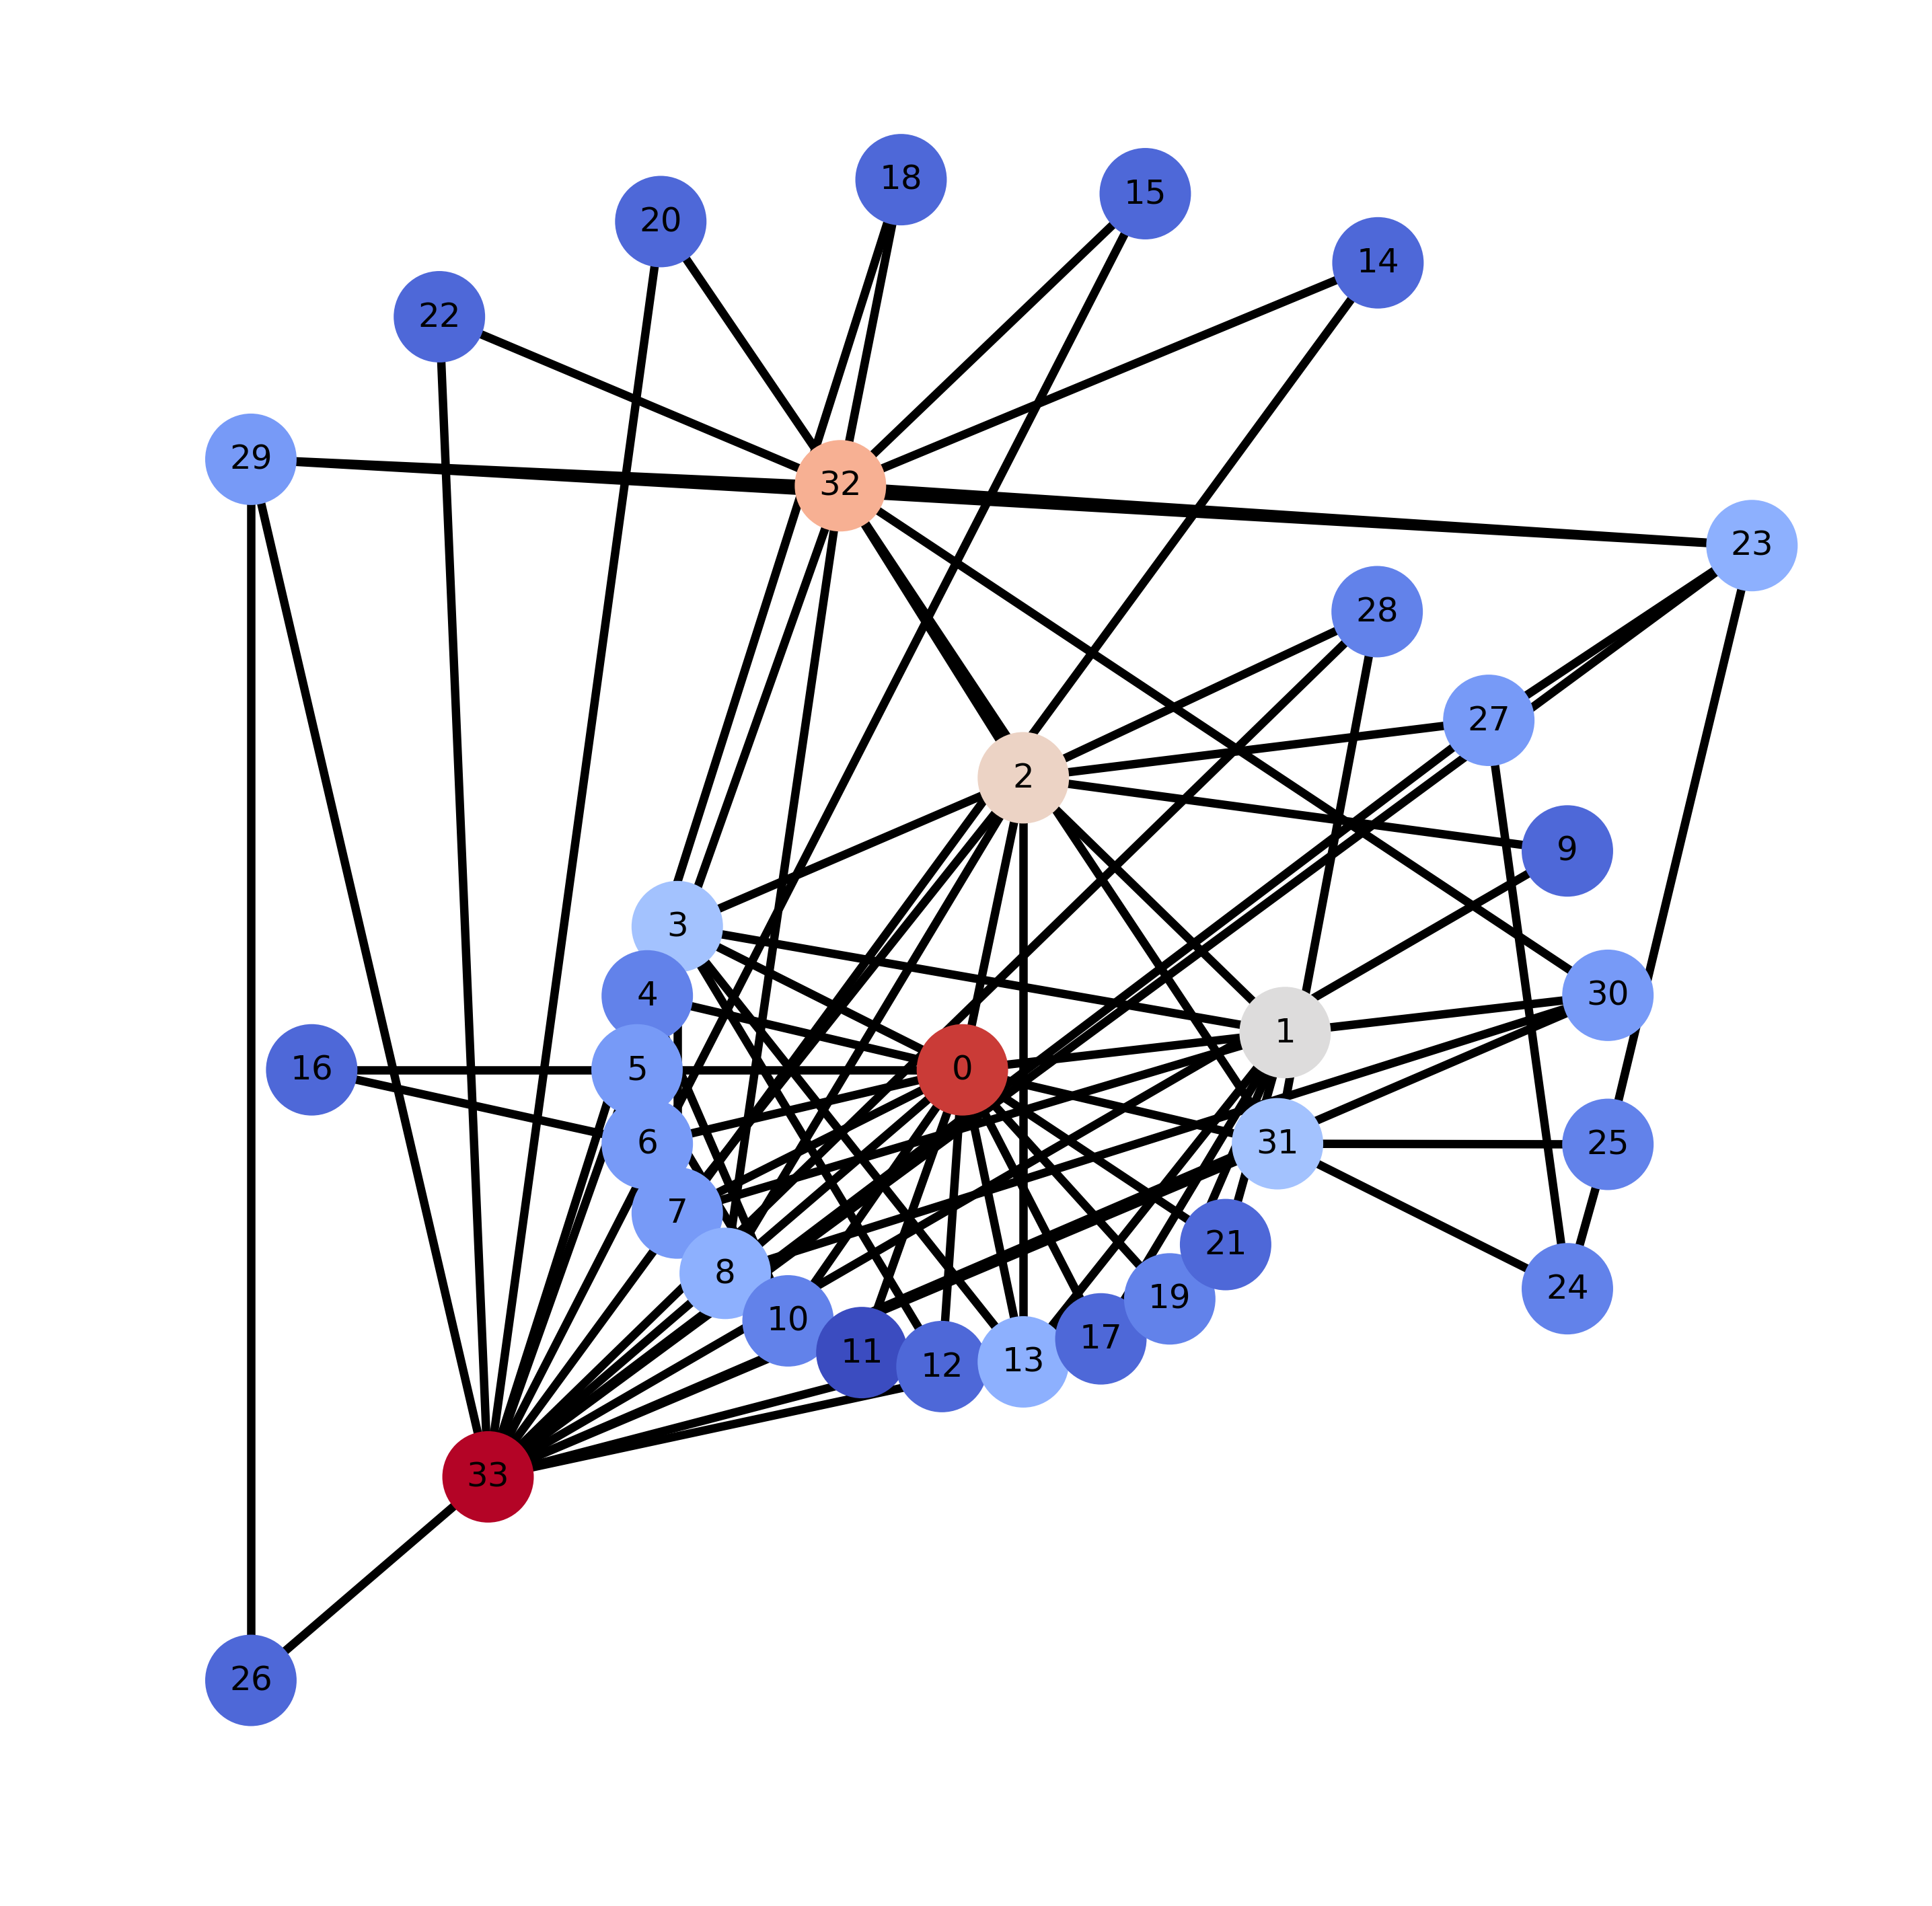

In [85]:
plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="twopi", root=0)
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()

Node `33`s inner circle has very little overlap with `0`s although nodes `1` and `2` seem to be a bridge.

&nbsp;

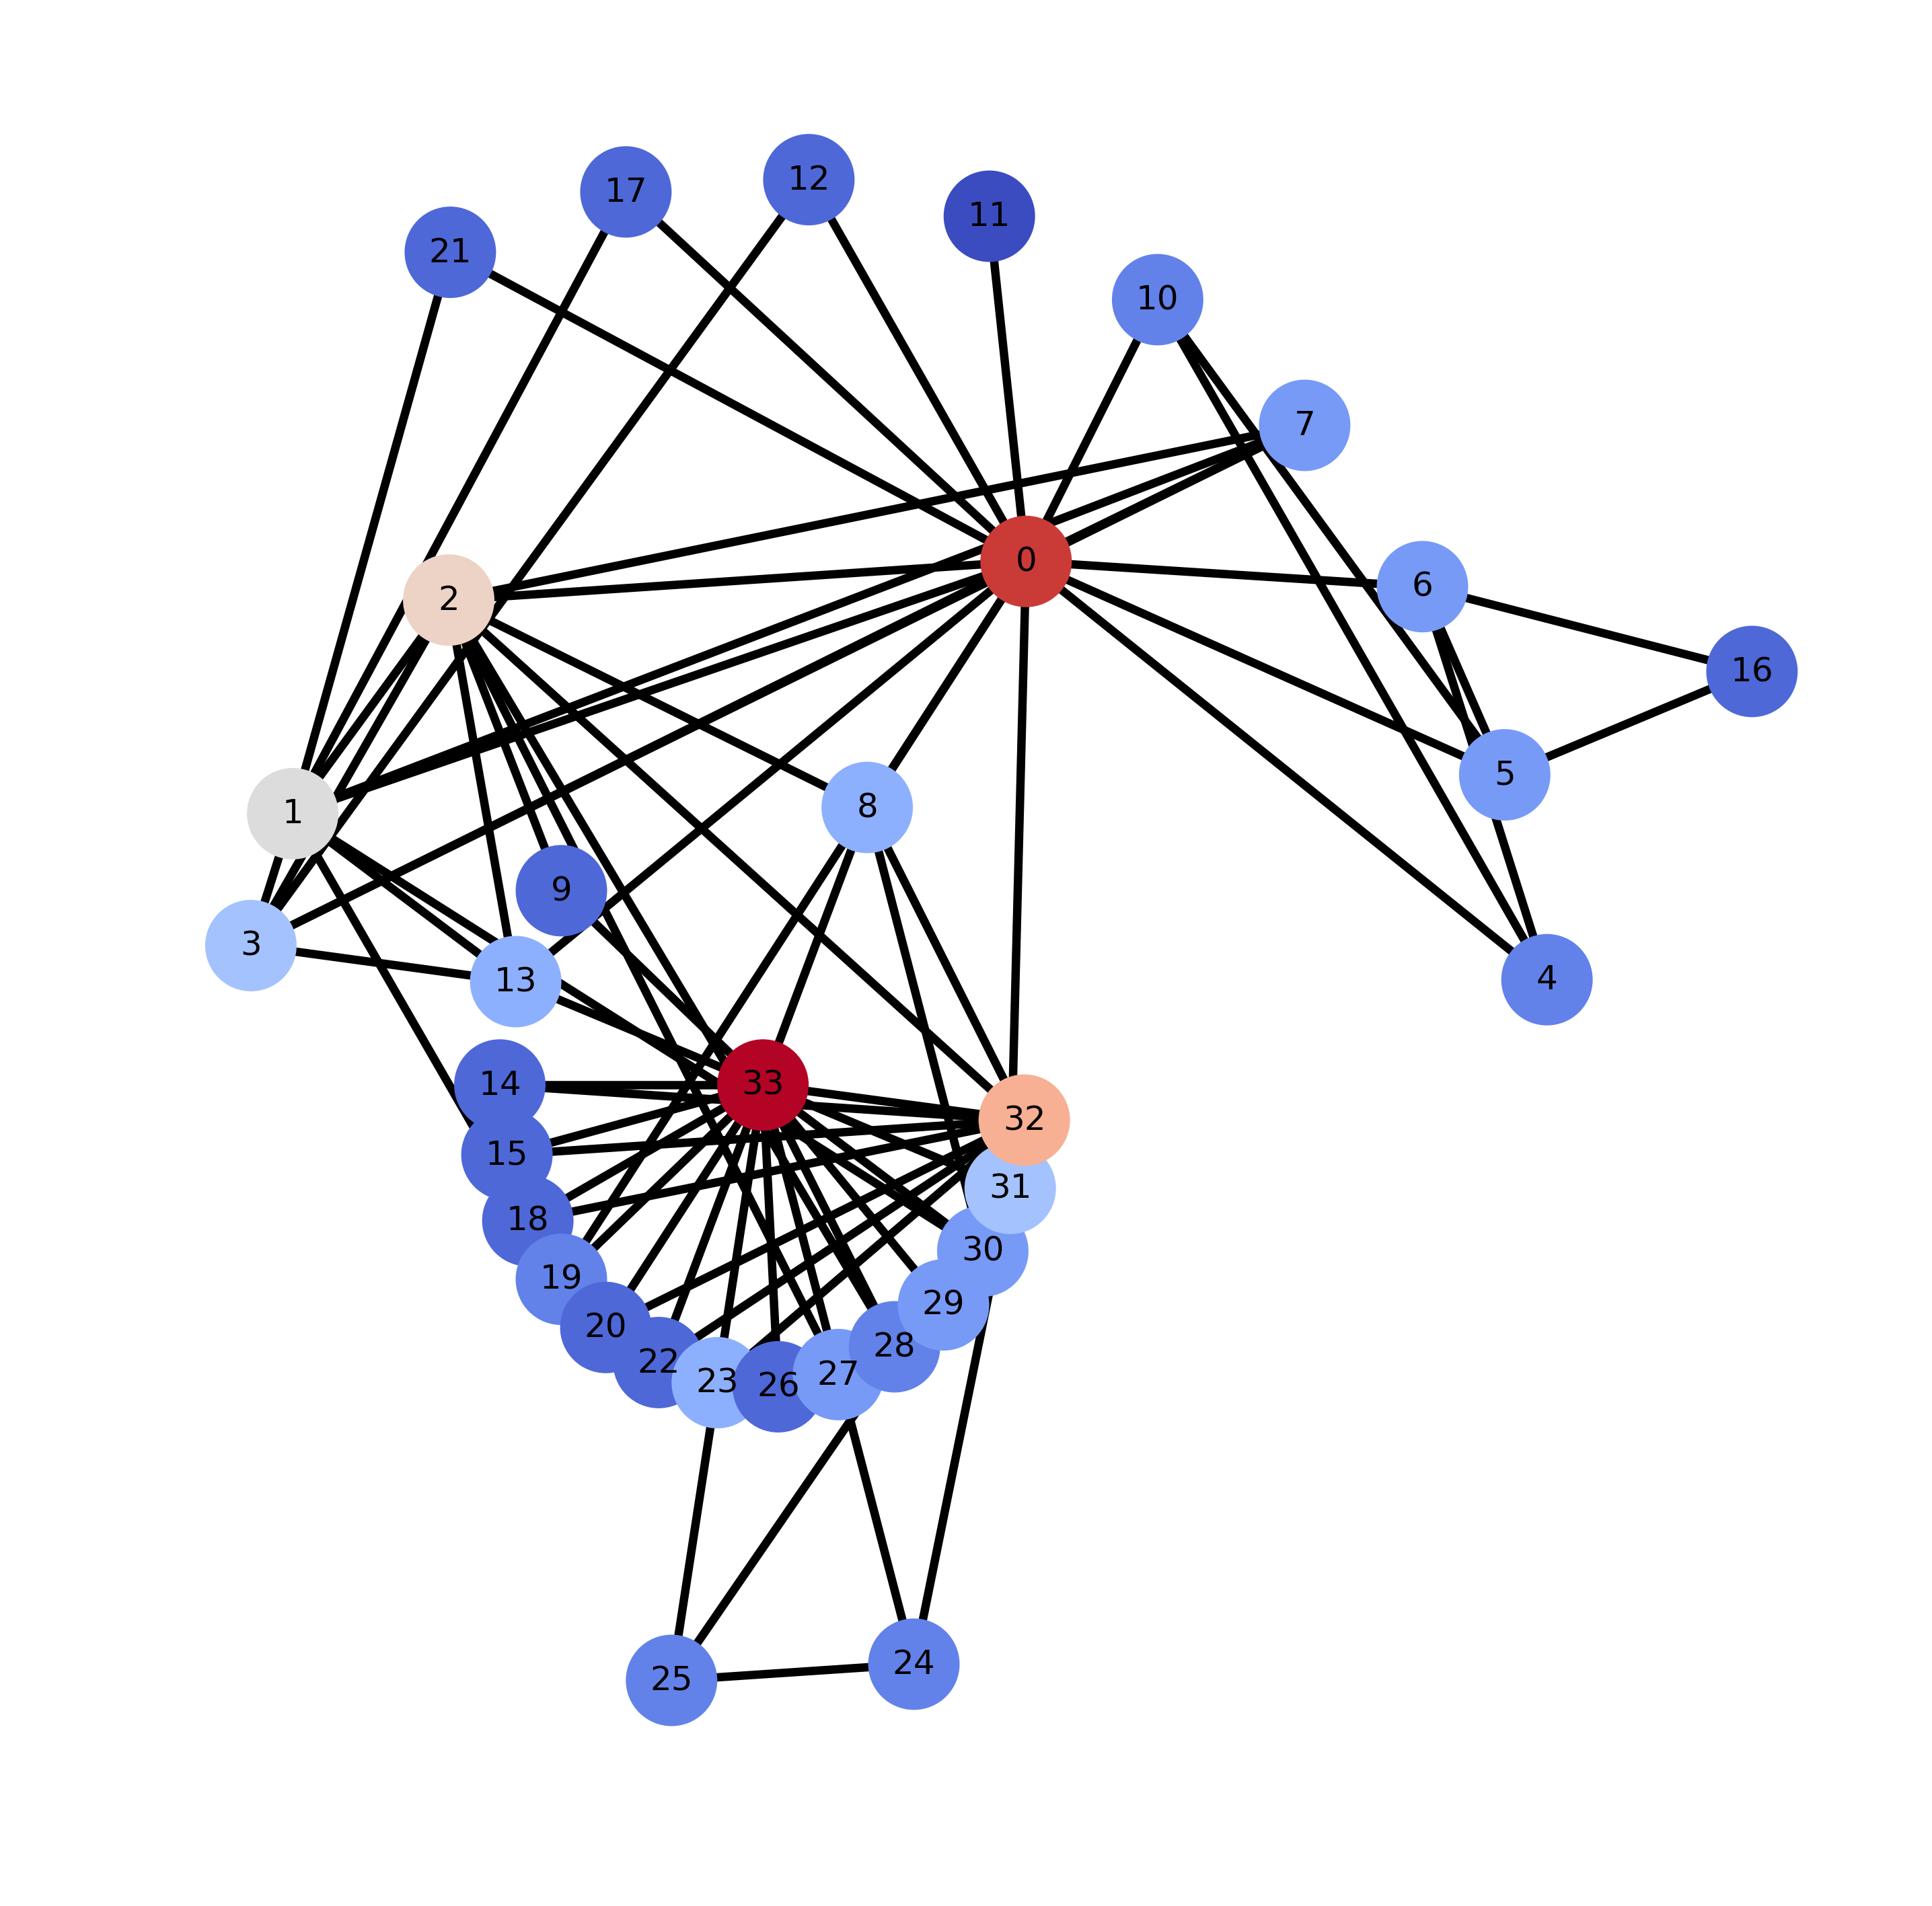

In [39]:
plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="twopi", root=33)
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()

### Get More Data

Currently the data for a node looks like this:

In [139]:
print("\nEdge Data: {}".format(G[3]))
print("Node Data: {}".format(G.node[3]))


Edge Data: {0: {'weight': '3'}, 1: {'weight': '3'}, 2: {'weight': '3'}, 7: {'weight': '3'}, 12: {'weight': '3'}, 13: {'weight': '3'}}
Node Data: {'club': 'Mr. Hi'}


&nbsp;

Each node is a dictionary containing the nodes it is connected to as a key value and an empty dictionary as the value. This is incomplete data, the dataset also includes how many interactions each node is observed conducting with the others. From the [NetworkX graph datasource](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary):

&nbsp;

> DESCRIPTION Two 34×34 matrices.
>
>    ZACHE symmetric, binary.
>    ZACHC symmetric, valued. 
>
> BACKGROUND These are data collected from the members of a university karate club by Wayne Zachary. The ZACHE matrix represents the presence or absence of ties among the members of the club; the ZACHC matrix indicates the relative strength of the associations (number of situations in and outside the club in which interactions occurred).
>
> Zachary (1977) used these data and an information flow model of network conflict resolution to explain the split-up of this group following disputes among the members.
>
>REFERENCE
>
>    Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.

&nbsp;

The data consists of the two $32 \times 32$ matricies and the index of each node from the NetworkX graph does corispond correctly to the rows of the dataset. To add the desired data we only need the originial data source and then add them. Attributes for graphs, nodes, and edges are stored as key/value pairs in a dictionary. To [add the attributes for a weighted graph](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/weighted_graph.html) use `G.add_edge('a','b',weight=x)` where `a` is the node, `b` is the node connected to, and `x` is the connection strength.

We can avoid writing range loops and use iteraters if we split each line into a list of values and use the `enumerate()` function to extract the data encoded in the index values for both the lines and the values in each. For example the data for node 3 will be transformed as follows:

&nbsp;

     3 3 3 0 0 0 0 3 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

```python
(3, [(0, '3'), (1, '3'), (2, '3'), (3, '0'), (4, '0'), (5, '0'), (6, '0'), (7, '3'), (8, '0'), (9, '0'), (10, '0'), (11, '0'), (12, '3'), (13, '3'), (14, '0'), (15, '0'), (16, '0'), (17, '0'), (18, '0'), (19, '0'), (20, '0'), (21, '0'), (22, '0'), (23, '0'), (24, '0'), (25, '0'), (26, '0'), (27, '0'), (28, '0'), (29, '0'), (30, '0'), (31, '0'), (32, '0'), (33, '0')])
```

&nbsp;

Each element paired with its index value, for each line representing the node the data is for, and for each data point the node the connection strength is related to. It would also be nice to have the data normalized so we should find the max connection weight.

&nbsp;

In [150]:
with open('connection_matrix.dat', 'r') as datfile:
    data = []
    for line in datfile:
        data.append(max(line))

max_weight = float(max(data))
print("\nMaximum Weight: {}".format(max_weight))


Maximum Weight: 7.0


&nbsp;

To normalize a value in python against a known max value:

```python
norm = float(value)/max_value
```

&nbsp;

In [182]:
with open('connection_matrix.dat', 'r') as datfile:
    
    # Generate a list of lists 
    # Each with the connection strength
    lines = []
    for line in datfile:
        lines.append(line.split())
    
    # Enumerate to get the data encoded by index
    # The index of each item per line represents
    # The connected node
    for line in enumerate(lines):
        lines[line[0]] = list(enumerate(line[1]))
        
    # Enter the data in the graph
    for line in enumerate(lines):
        strength={}
        for connection in line[1]:
            if int(connection[1]) is not 0:
                node=connection[0]
                weight=float(connection[1])
                norm_weight=float(weight)/max_weight
                G.add_edge(line[0], node, weight=weight, norm_weight=norm_weight)

print("\nEdge Data: {}".format(G[3]))
print("Node Data: {}".format(G.node[3]))


Edge Data: {0: {'weight': 3.0, 'norm_weight': 0.42857142857142855}, 1: {'weight': 3.0, 'norm_weight': 0.42857142857142855}, 2: {'weight': 3.0, 'norm_weight': 0.42857142857142855}, 7: {'weight': 3.0, 'norm_weight': 0.42857142857142855}, 12: {'weight': 3.0, 'norm_weight': 0.42857142857142855}, 13: {'weight': 3.0, 'norm_weight': 0.42857142857142855}}
Node Data: {'club': 'Mr. Hi'}


&nbsp;

With the weight values we can now create more graphs!

&nbsp;

### More Graphs!

Now with the weight data we can color the edges to represent weight, two color schemes in one might be a bit much though. So lets change node size based on degree and color the edges.

&nbsp;

In [254]:
node_degrees = [ G.degree()[node] for node in G.nodes() ]
node_degrees_norm = [ node_degree/max(node_degrees) for node_degree in node_degrees]
node_size = [ node_degree*3000 for node_degree in node_degrees_norm ]

print("\nMax Node Size: {}".format(max(node_size)))
print("Min Node Size: {}".format(min(node_size)))


Max Node Size: 3000.0
Min Node Size: 176.47058823529412


In [320]:
edge_cmap = plt.cm.viridis

# Get the data for edge colors
edges = G.edges()
edge_weights = [ G[source][dest]['weight'] for source, dest in edges ]
edge_color = [ edge_cmap(weight/max_weight) for weight in edge_weights ]

# A background (node) color to go with it
viridis_bkgrd = '#333333'
label_color = '#8e89a5'

&nbsp;

Unlike the degree of the nodes the exact weight of the connections can not be seen so we will want a heatmap scale to display the values.

&nbsp;

In [326]:
plt.ioff() # Don't do anything while setting up scale
colors_unscaled = [ tuple(map(lambda x: max_weight*x, y)) for y in edge_color ]
heatmap = plt.pcolor(colors_unscaled, cmap=edge_cmap)
plt.close()

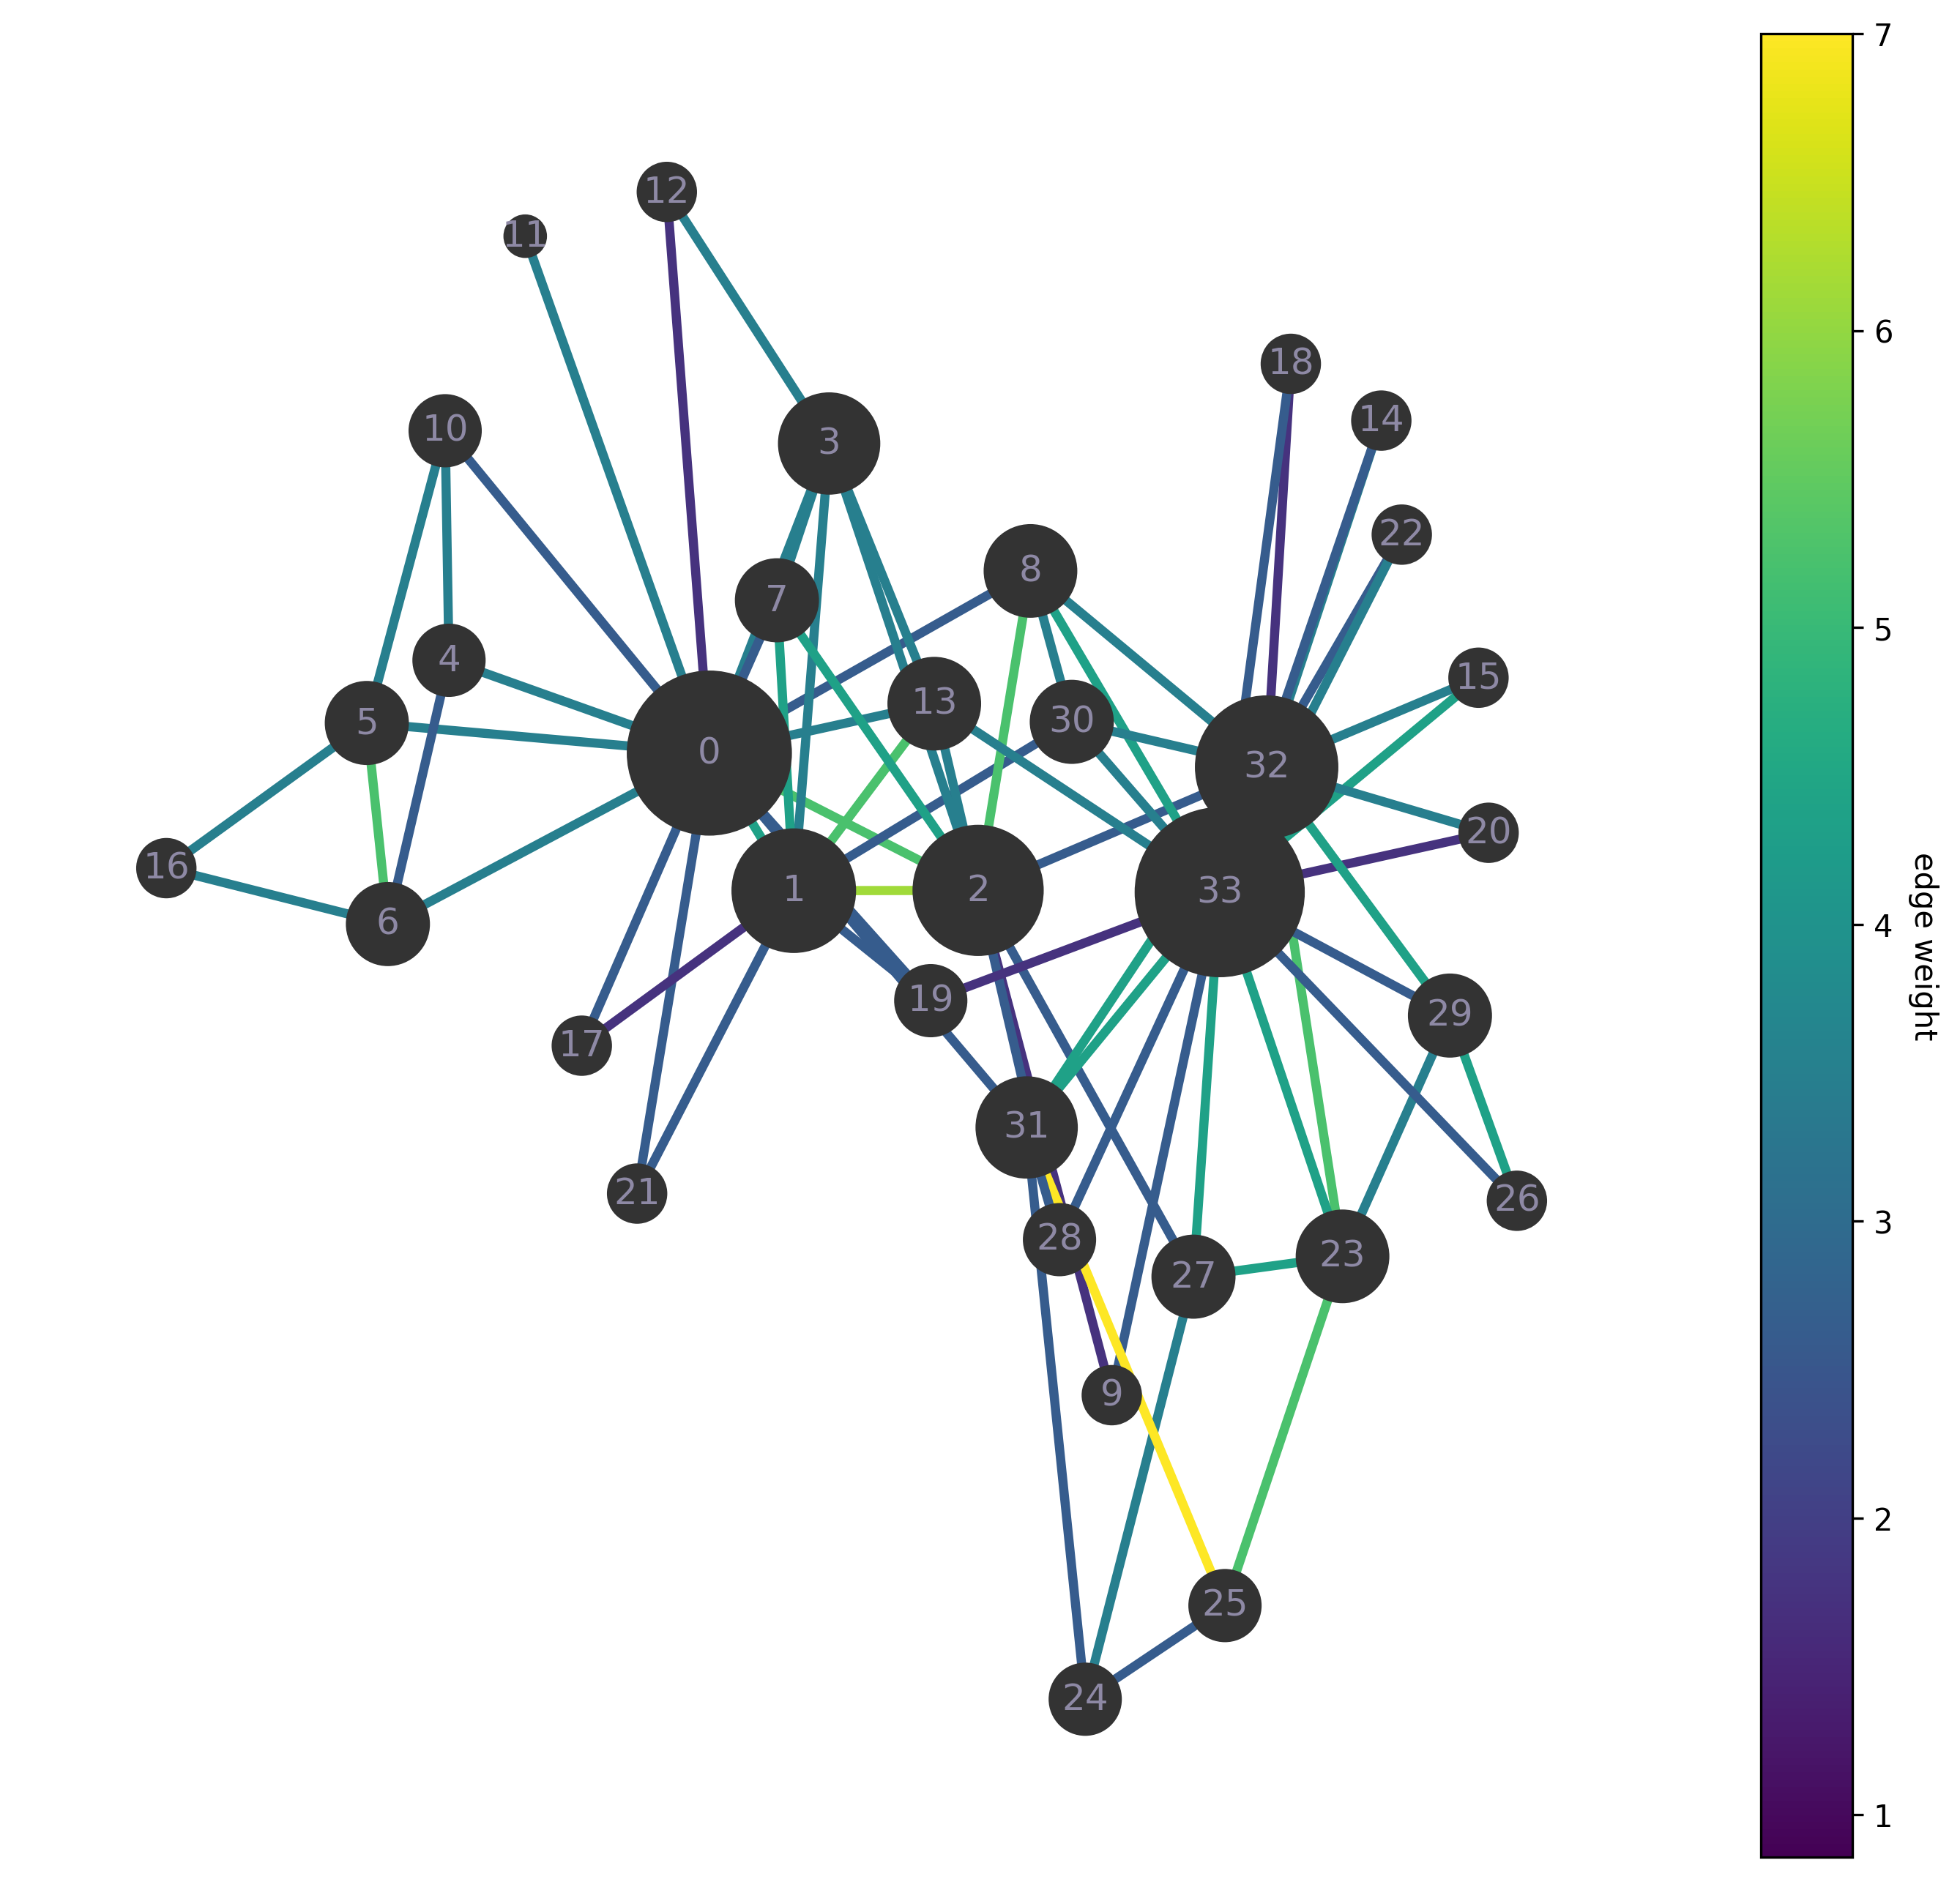

In [322]:
#plt.figure(figsize=(9,9), dpi=300)
fig, axes = plt.subplots(1,1, figsize=(12,11), dpi=300, frameon=False)
pos = nx.nx_pydot.graphviz_layout(G,prog="fdp", root=33)
nx.draw_networkx(G, pos, node_color=viridis_bkgrd, node_size=node_size,
                 edges=edges, edge_color=edge_color, ax = axes,
                 width=3, with_labels=True, font_color=label_color)
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
plt.axis('off')

# colorbar
cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('edge weight',labelpad=15,rotation=270)

plt.ion()
plt.show()

&nbsp;

It is a bit noisy and above all we are interested in the strongest connections. We can change the pattern of the edges at a given threshold to change from dashed to solid. This will take a lot more code though because each group of edges must be split up, graphed sepeartely, and each needs its own colorscale.

Once split up below with the top third having solid lines, the middle third with dashed lines, and the bottom third with dotted lines it looks noisy. But then again it looks noisy right above. We can at least instantly identify the strongest links. Most of the split should be visably predictable at this point.

&nbsp;

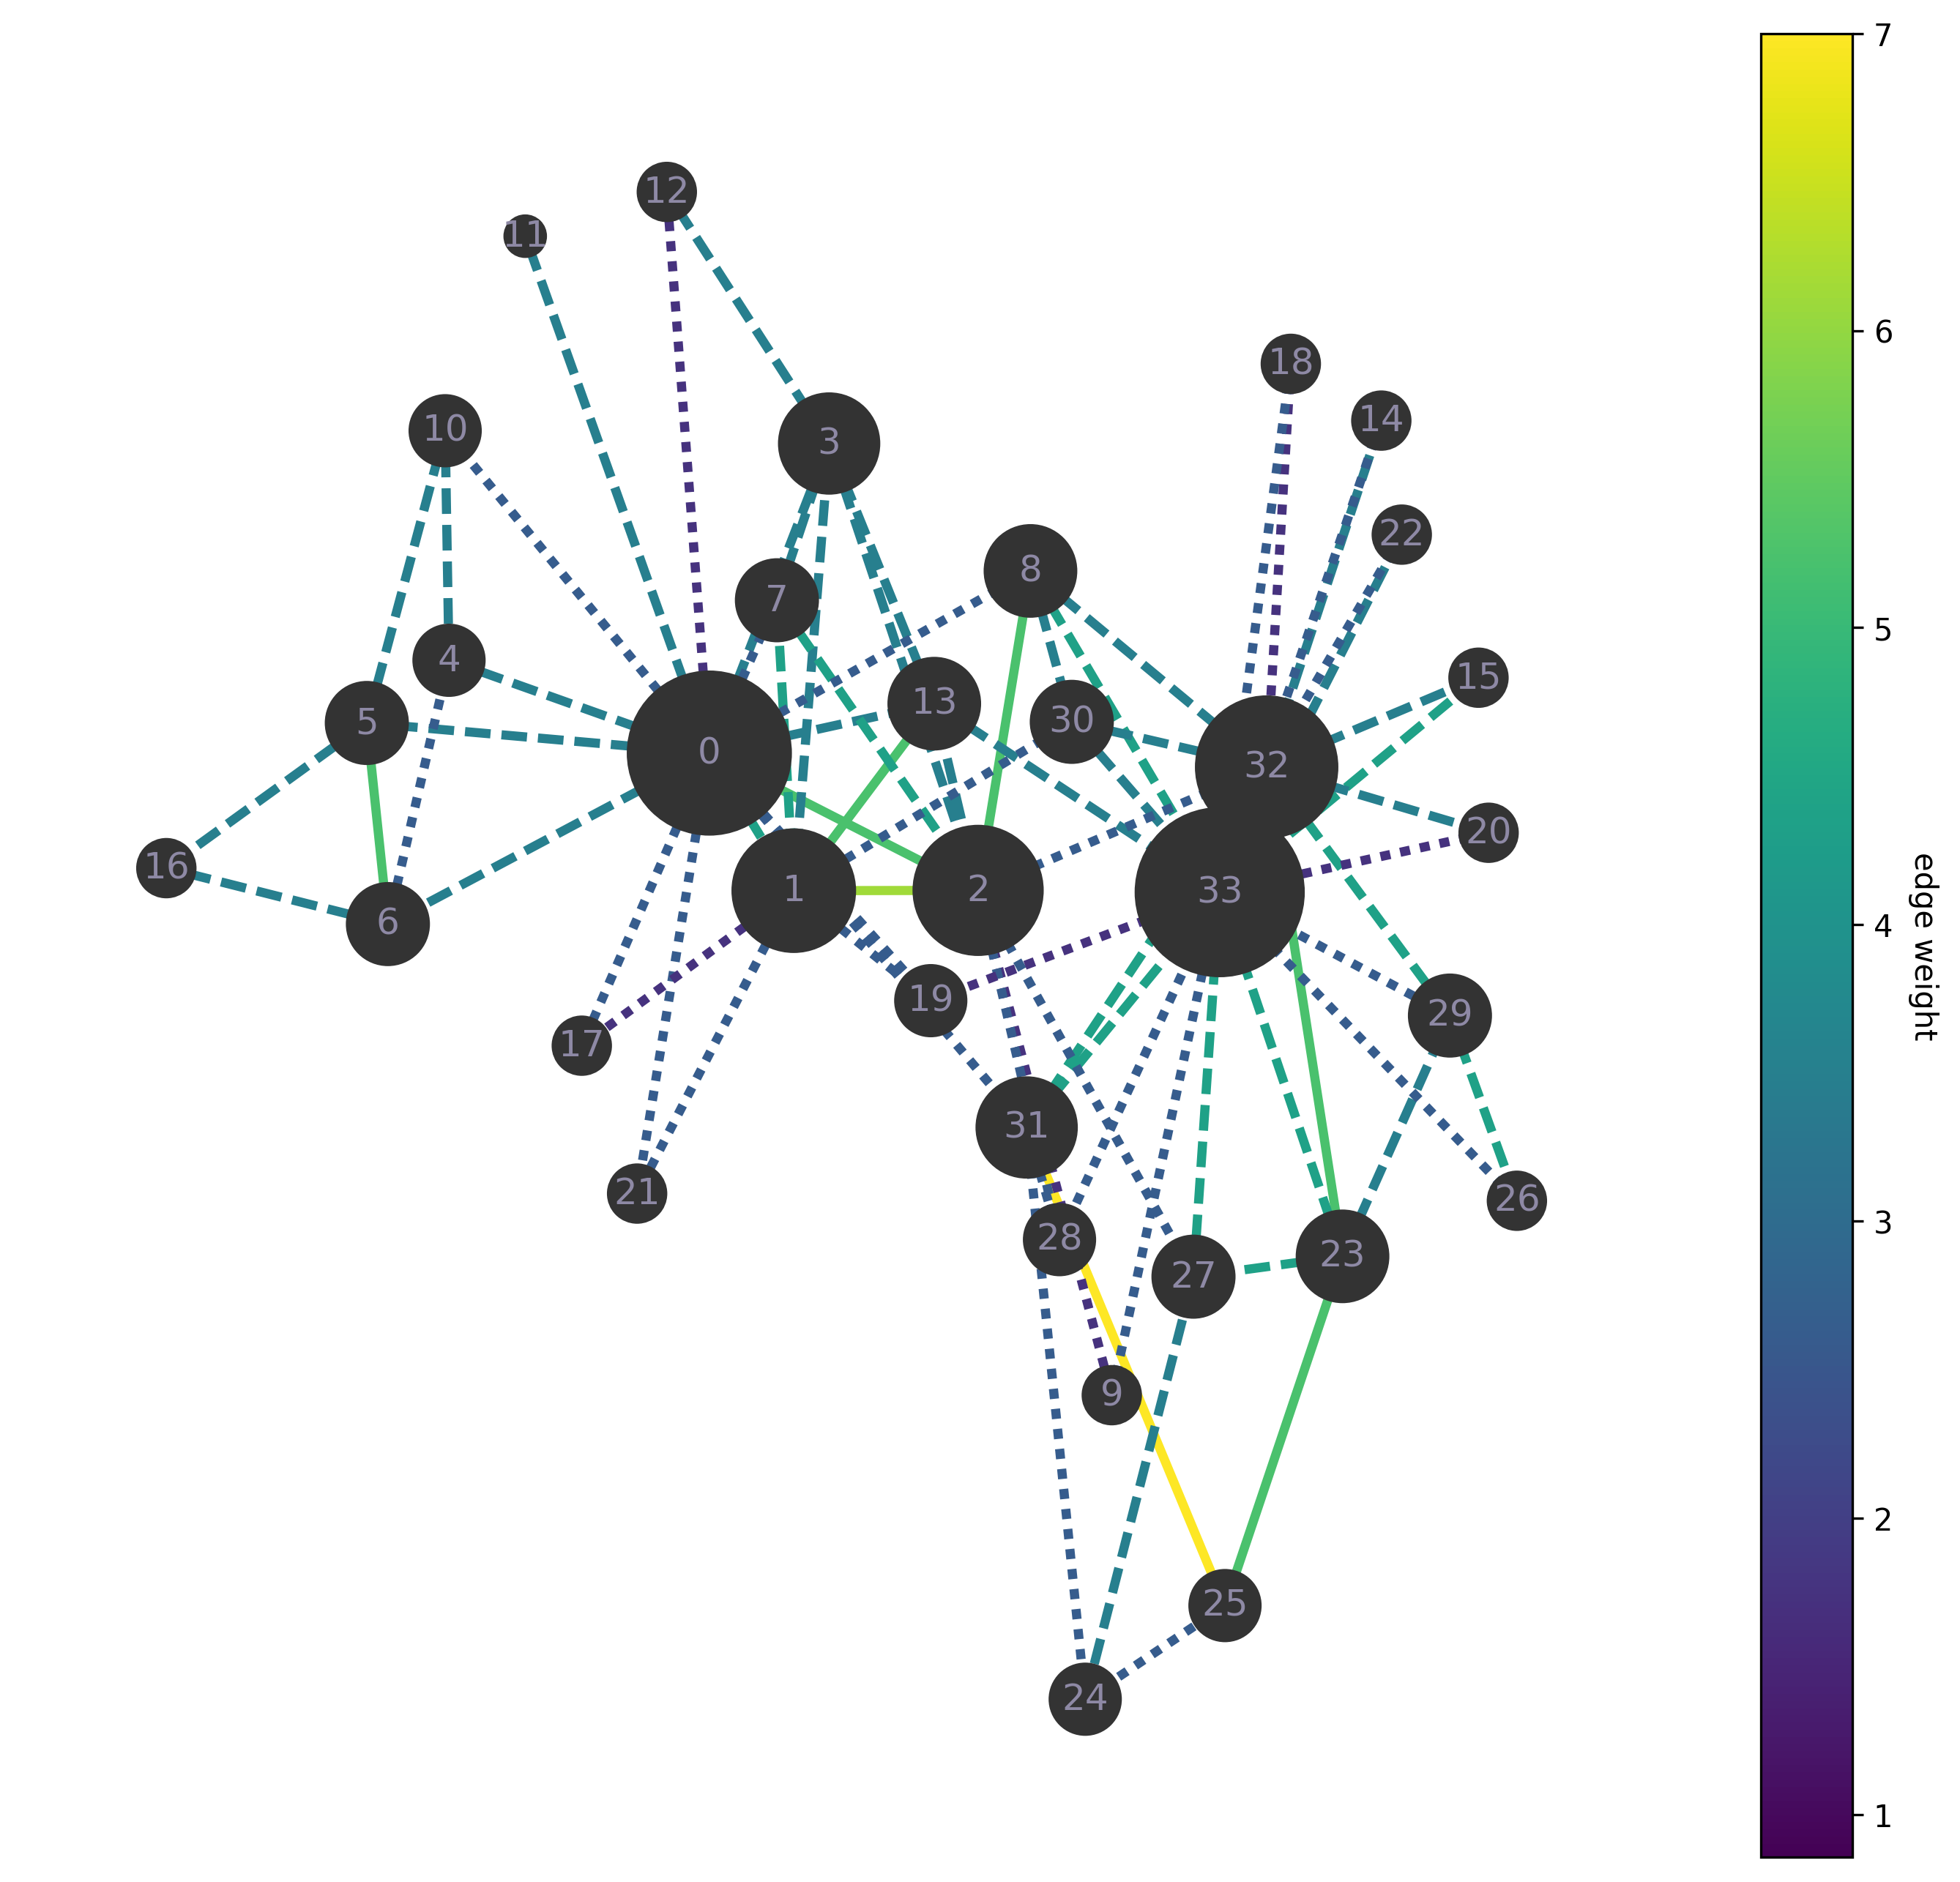

In [373]:
heavy = [(u,v) for (u,v,d) in G.edges(data=True) if d['norm_weight'] > 0.66]
mid = [(u,v) for (u,v,d) in G.edges(data=True) if d['norm_weight'] <= 0.66 and d['norm_weight'] > 0.33 ]
lite = [(u,v) for (u,v,d) in G.edges(data=True) if d['norm_weight'] <= 0.33]

# Re-map the colors
heavy_edge_weights = [ G[source][dest]['weight'] for source, dest in heavy ]
heavy_edge_color = [ edge_cmap(weight/max_weight) for weight in heavy_edge_weights ]
mid_edge_weights = [ G[source][dest]['weight'] for source, dest in mid ]
mid_edge_color = [ edge_cmap(weight/max_weight) for weight in mid_edge_weights ]
lite_edge_weights = [ G[source][dest]['weight'] for source, dest in lite ]
lite_edge_color = [ edge_cmap(weight/max_weight) for weight in lite_edge_weights ]

# Graph everything seperate
fig, axes = plt.subplots(1,1, figsize=(12,11), dpi=300, frameon=False)
pos = nx.nx_pydot.graphviz_layout(G,prog="fdp", root=33)
nx.draw_networkx_nodes(G, pos, node_color=viridis_bkgrd, node_size=node_size,
                       with_labels=True, ax = axes, linewidths=1)
nx.draw_networkx_labels(G, pos, font_color=label_color)
nx.draw_networkx_edges(G, pos, edgelist=heavy, edge_color=heavy_edge_color, width=3)
nx.draw_networkx_edges(G, pos, edgelist=mid, edge_color=mid_edge_color, width=3, style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=lite, edge_color=lite_edge_color, width=3, style='dotted')

# Get rid of boundaries
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
plt.axis('off')

# colorbar
cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('edge weight',labelpad=15,rotation=270)

plt.show()

&nbsp;

Prediction based on weighted graph:

&nbsp;

In [403]:
mr_hi_group = sorted([8, 2, 19, 13, 1, 0, 7, 3, 21, 12, 17, 11, 10, 4, 5, 6, 16])
officer_group = sorted([31, 28, 9, 24, 25, 27, 23, 26, 29, 20, 15, 22, 14, 18, 32, 33, 30])
print("Mr. Hi's Group: {}".format(mr_hi_group))
print("Officers Group: {}".format(officer_group))

Mr. Hi's Group: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
Officers Group: [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


&nbsp;

## Checking the Result

First check to see if the number of people in each subgroup match. 

&nbsp;

In [402]:
mr_hi = 0
officer = 0
for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
        mr_hi += 1
    if node[1]['club'] == 'Officer':
        officer += 1

print("\nMr. Hi: {}".format(mr_hi))
print("Officer: {}".format(officer))


Mr. Hi: 17
Officer: 17


&nbsp;

The number in each group match, what about the actual memebers?

&nbsp;

In [404]:
fail = False
for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi' and node[0] not in mr_hi_group:
        print("Predicted node {} wrong.".format(node))
        fail = True
    if node[1]['club'] == 'Officer' and node[0] not in officer_group:
        print("Predicted node {} wrong.".format(node))
        fail = True

if fail:
    print("\nDidn't guess right...")
else:
    print("\nGuessed Correctly!")


Guessed Correctly!


&nbsp;

I guess it is pretty easy to see it after graphing. I did almost misplace nodes `30` and `19` though.

## One More Graph

The graph with the split.

&nbsp;

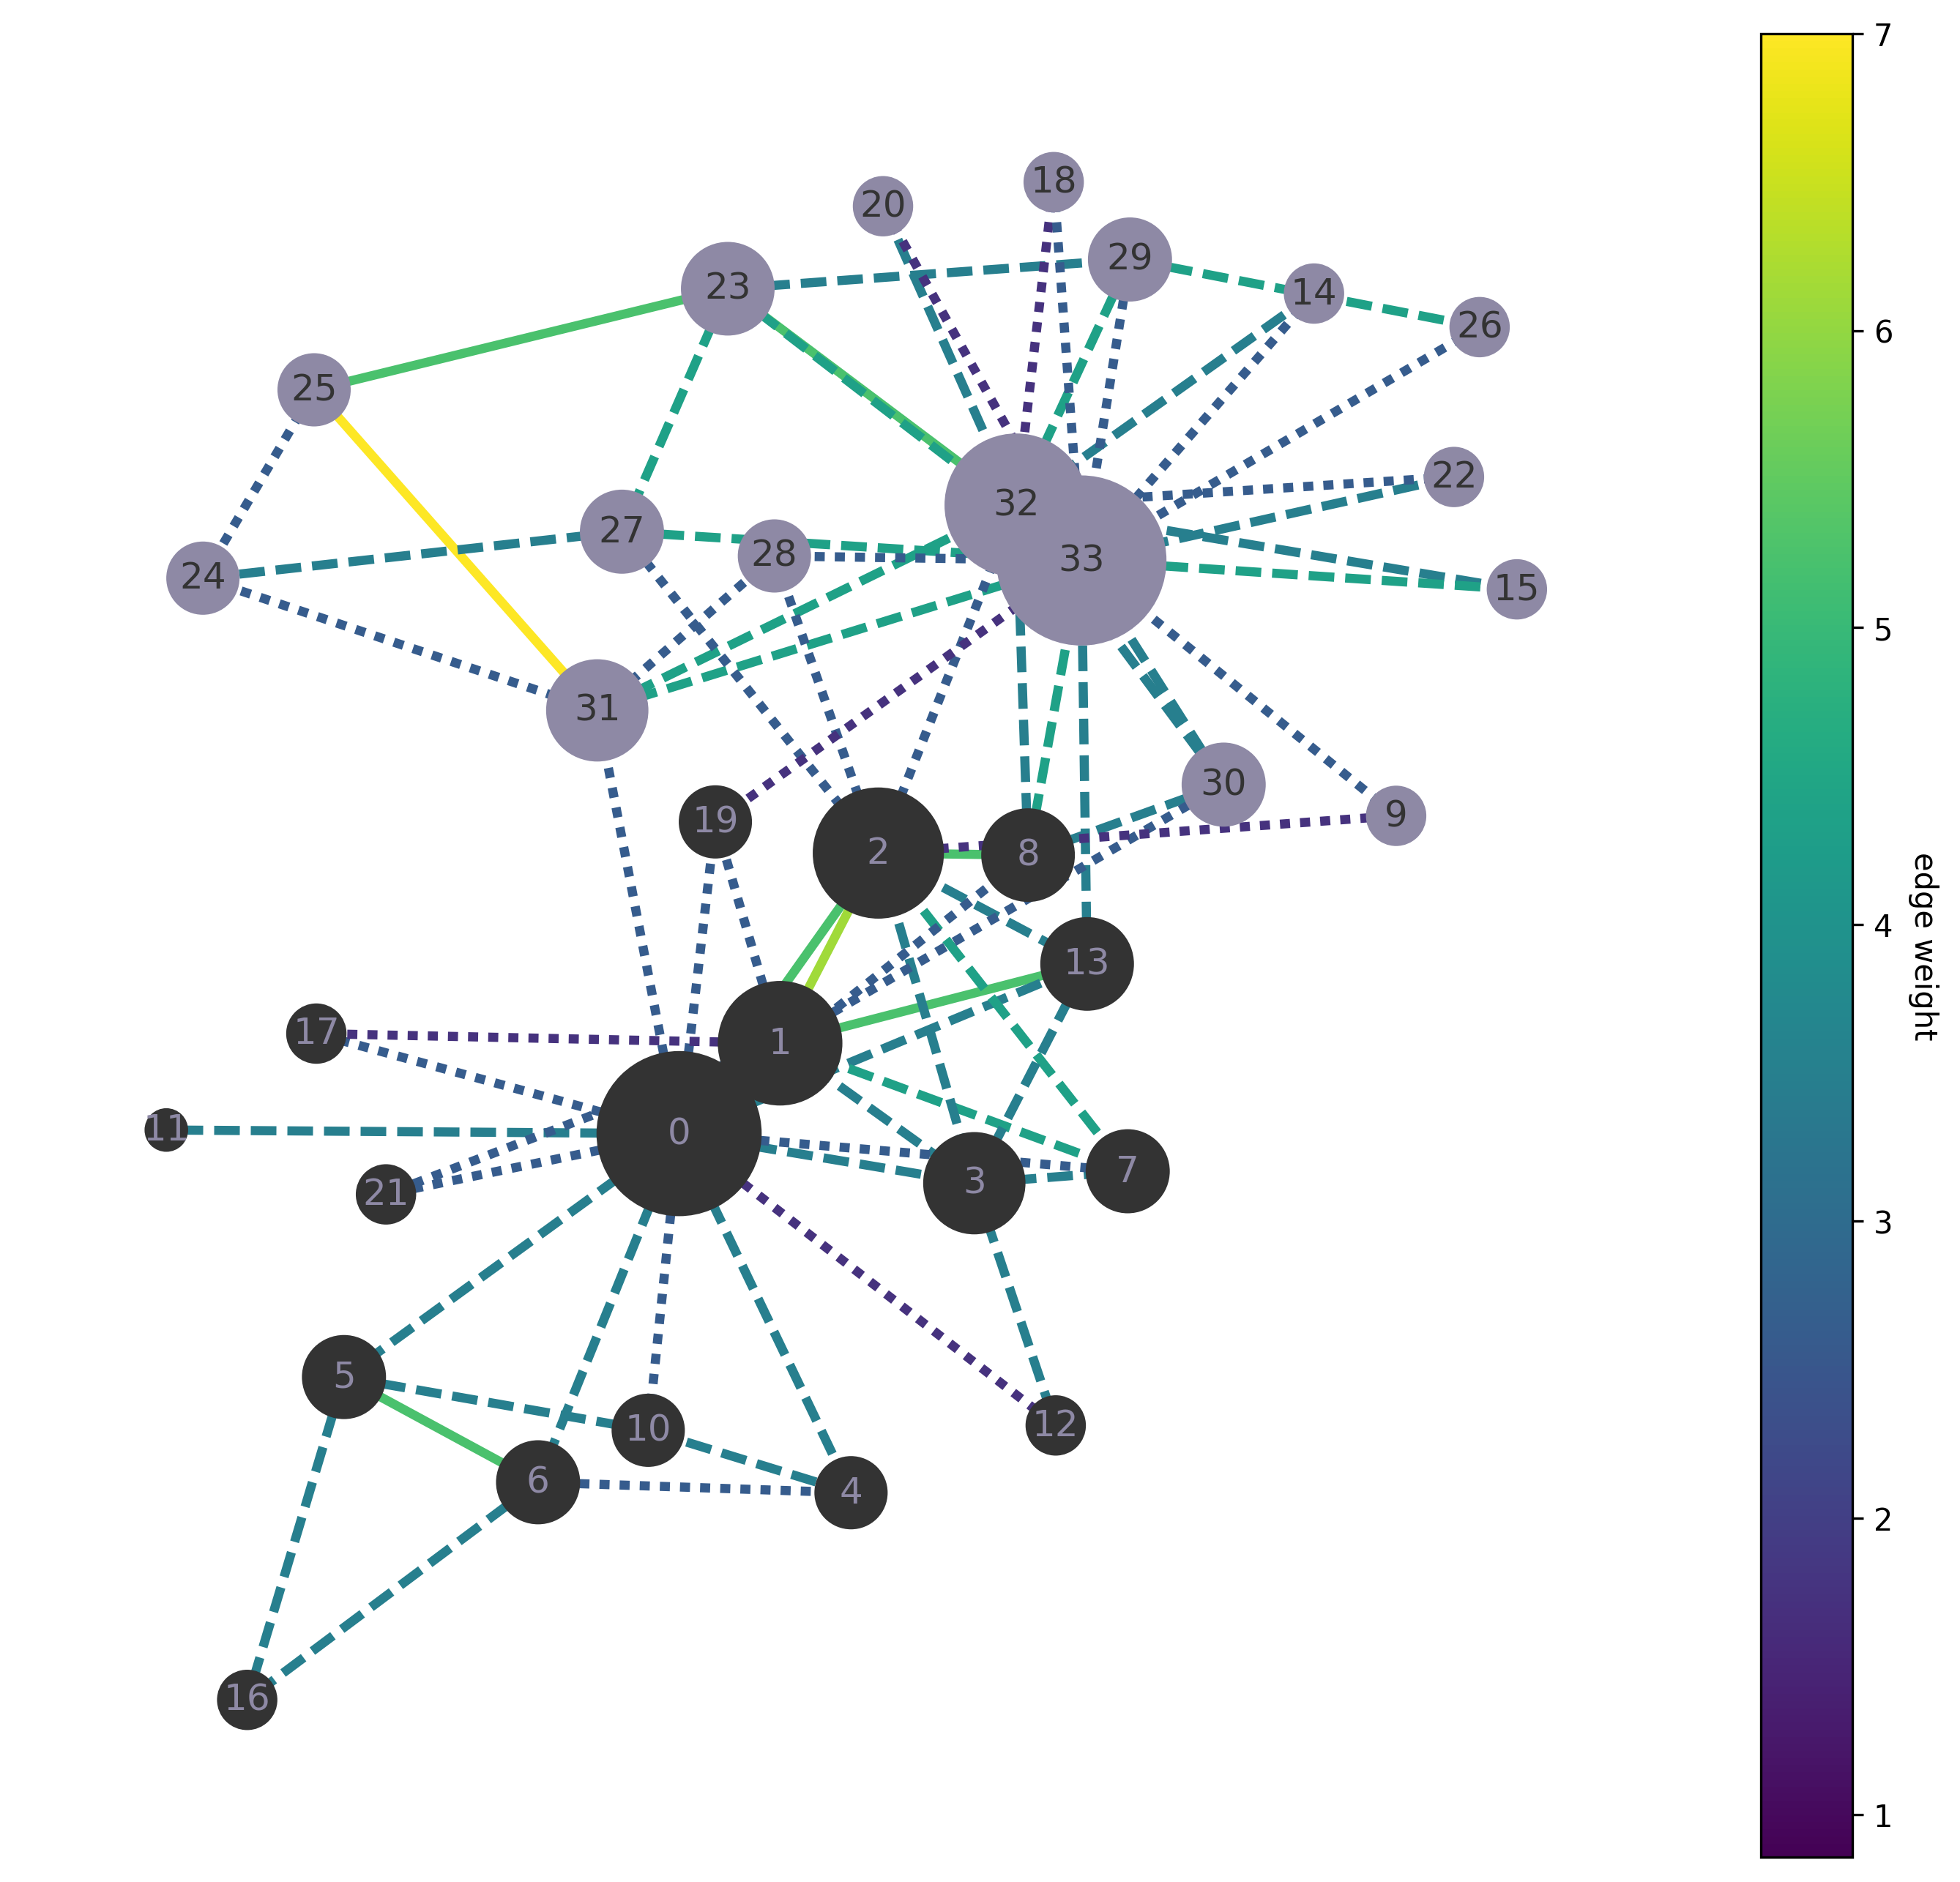

In [415]:
# Split the node labels into categories based on group
mr_hi_labels = {}
officer_labels = {}
for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
        mr_hi_labels.update({node[0]: node[0]})
    if node[1]['club'] == 'Officer':
        officer_labels.update({node[0]: node[0]})

# Split the edges into categories based on weight
heavy = [(u,v) for (u,v,d) in G.edges(data=True) if d['norm_weight'] > 0.66]
mid = [(u,v) for (u,v,d) in G.edges(data=True) if d['norm_weight'] <= 0.66 and d['norm_weight'] > 0.33 ]
lite = [(u,v) for (u,v,d) in G.edges(data=True) if d['norm_weight'] <= 0.33]

# Re-map the colors
heavy_edge_weights = [ G[source][dest]['weight'] for source, dest in heavy ]
heavy_edge_color = [ edge_cmap(weight/max_weight) for weight in heavy_edge_weights ]
mid_edge_weights = [ G[source][dest]['weight'] for source, dest in mid ]
mid_edge_color = [ edge_cmap(weight/max_weight) for weight in mid_edge_weights ]
lite_edge_weights = [ G[source][dest]['weight'] for source, dest in lite ]
lite_edge_color = [ edge_cmap(weight/max_weight) for weight in lite_edge_weights ]

# Node colormap
node_color_map = {'Mr. Hi': viridis_bkgrd, 'Officer': label_color}
node_colors = [ node_color_map[G.node[node]['club']] for node in G ]

# Graph everything seperate
fig, axes = plt.subplots(1,1, figsize=(12,11), dpi=300, frameon=False)
pos = nx.nx_pydot.graphviz_layout(G,prog="neato", root=33)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size,
                       with_labels=True, ax = axes, linewidths=1)
nx.draw_networkx_labels(G, pos, labels=mr_hi_labels, font_color=label_color)
nx.draw_networkx_labels(G, pos, labels=officer_labels, font_color=viridis_bkgrd)
nx.draw_networkx_edges(G, pos, edgelist=heavy, edge_color=heavy_edge_color, width=3)
nx.draw_networkx_edges(G, pos, edgelist=mid, edge_color=mid_edge_color, width=3, style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=lite, edge_color=lite_edge_color, width=3, style='dotted')

# Get rid of boundaries
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
plt.axis('off')

# colorbar
cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('edge weight',labelpad=15,rotation=270)

plt.show()

I have not yet done anything but visual analysis. I'll read the papers and address them in the next notebook which will contain the the final graph in R. But if it can be visually predicted it can certainly be mathematically predicted.